<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#QC-Thresholds" data-toc-modified-id="QC-Thresholds-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>QC Thresholds</a></span></li><li><span><a href="#Inputs" data-toc-modified-id="Inputs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Inputs</a></span></li><li><span><a href="#Load-expression-data" data-toc-modified-id="Load-expression-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load expression data</a></span></li><li><span><a href="#Load-QC-data" data-toc-modified-id="Load-QC-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Load QC data</a></span></li><li><span><a href="#Load-metadata" data-toc-modified-id="Load-metadata-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Load metadata</a></span></li><li><span><a href="#Remove-extra-sample-rows" data-toc-modified-id="Remove-extra-sample-rows-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Remove extra sample rows</a></span></li></ul></li><li><span><a href="#Check-statistics" data-toc-modified-id="Check-statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check statistics</a></span><ul class="toc-item"><li><span><a href="#FastQC-stats" data-toc-modified-id="FastQC-stats-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>FastQC stats</a></span></li><li><span><a href="#Percent-of-reads-aligned-to-genome" data-toc-modified-id="Percent-of-reads-aligned-to-genome-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Percent of reads aligned to genome</a></span></li><li><span><a href="#Number-of-aligned-reads" data-toc-modified-id="Number-of-aligned-reads-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Number of aligned reads</a></span></li></ul></li><li><span><a href="#Examine-Global-Correlations" data-toc-modified-id="Examine-Global-Correlations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examine Global Correlations</a></span><ul class="toc-item"><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Hierarchical Clustering</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Metadata-Curation" data-toc-modified-id="Metadata-Curation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metadata Curation</a></span><ul class="toc-item"><li><span><a href="#BioProject-counts-of-passing-metadata" data-toc-modified-id="BioProject-counts-of-passing-metadata-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>BioProject counts of passing metadata</a></span></li><li><span><a href="#BioProject-counts-of-all-metadata" data-toc-modified-id="BioProject-counts-of-all-metadata-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>BioProject counts of all metadata</a></span></li></ul></li><li><span><a href="#Correlations-between-replicates" data-toc-modified-id="Correlations-between-replicates-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlations between replicates</a></span><ul class="toc-item"><li><span><a href="#Compute-Pearson-R-Score" data-toc-modified-id="Compute-Pearson-R-Score-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Compute Pearson R Score</a></span></li><li><span><a href="#Drop-Samples-with-no-replicates" data-toc-modified-id="Drop-Samples-with-no-replicates-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Drop Samples with no replicates</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Save-final-datasets" data-toc-modified-id="Save-final-datasets-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Save final datasets</a></span></li></ul></div>

<font size="4">This is a template notebook for performing preliminary quality control on your organism's expression data.</font>

In [231]:
import os
import pandas as pd
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [232]:
#sns.set_style('ticks')
sns.set_style('whitegrid')

# Setup

## QC Thresholds

In [233]:
min_pct_aligned = 40 # Minimum percent of reads aligned to genome
min_mrna_reads = 5e5 # Minimum number of reads mapped to mRNA

## Inputs

<font size="4">Enter organism name here</font>

In [240]:
organism = "Synechococcus_elongatus"

<font size="4">Show files in the organism directory</font>

In [241]:
org_dir = path.join('/home/tahani/Documents/github/modulome/data/organisms/',organism)
os.listdir(org_dir)

['1_log_tpm_final.csv',
 '.~lock.metadata_curated_non_project_spec.csv#',
 '.~lock.metadata_curated_project_spec.csv#',
 'README.md',
 'metadata_curated_project_spec.csv',
 '0_log_tpm.csv',
 '0_multiqc_stats.tsv',
 'metadata_curated_non_project_spec.csv',
 '1_metadata_final.csv',
 'metadata_passed_qc_part1.csv',
 '0_Synechococcus_elongatus.tsv',
 '0_multiqc_report.html',
 'Excel_files',
 'sequence_files']

<font size="4">Enter name of curated metadata file here</font>

In [249]:
metadata_file = "0_Synechococcus_elongatus.tsv"

## Load expression data

In [244]:
DF_log_tpm = pd.read_csv(path.join(org_dir,'0_log_tpm.csv'),index_col=0).fillna(0)
#DF_log_tpm = pd.read_csv('log_tpm.csv',index_col=0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])

Number of genes: 2714
Number of samples: 316


In [245]:
DF_log_tpm.fillna(0,inplace=True)
DF_log_tpm.head()

,SRX063252,SRX063253,SRX063254,SRX2356912,SRX2356913,SRX2356914,SRX2356915,SRX2356916,SRX2356917,SRX2356918,...,SRX4105568,SRX5055969,SRX5055970,SRX5055971,SRX5055972,SRX689242,SRX7119038,SRX7119039,SRX7119040,SRX7119041
Synonym,,,,,,,,,,,,,,,,,,,,,
ST32046_p9_1,1.094443,0.000000,0.000000,1.242455,0.000000,0.000000,0.000000,0.000000,0.923908,0.000000,...,0.000000,8.992414,8.689363,8.799804,9.230019,0.000000,8.992414,8.689363,7.470606,9.421962
ST32046_p4,6.751125,6.695140,6.797276,6.871729,7.567594,7.235381,7.554970,7.747519,7.544813,7.956658,...,6.822196,10.022218,9.813438,10.012642,10.310692,9.436531,10.022218,9.813438,10.233528,10.450636
ST32046_p5,4.567187,5.010412,4.993750,4.677404,4.004491,4.782736,5.544260,6.527694,6.573057,6.974330,...,5.760955,8.663294,8.613887,8.541705,9.211192,4.015564,8.663294,8.613887,8.002861,9.387248
ST32046_p9_2,3.626796,3.464509,4.526323,1.899955,4.370207,1.941895,3.290081,2.263834,3.556672,3.361541,...,4.453573,9.915409,9.318015,9.781962,9.956634,5.038455,9.915409,9.318015,9.459867,9.911681
ST32046_p7,1.709560,2.119775,2.928506,1.242455,0.000000,0.000000,0.000000,0.000000,2.198177,2.621678,...,3.104998,9.478533,8.930642,9.167613,9.979066,4.659791,9.478533,8.930642,7.315416,9.988962


## Load QC data
<font size="4">There may be some datasets that failed along the processing pipeline, so the number of samples with QC data may be higher than the number of samples with expression data.</font>

In [246]:
DF_qc_stats = pd.read_csv(path.join(org_dir,'0_multiqc_stats.tsv'),index_col=0, sep='\t')
print('Number of samples with QC data:',DF_qc_stats.shape[0])

Number of samples with QC data: 322


In [247]:
DF_qc_stats.fillna(0,inplace=True)
DF_qc_stats.head()

,mRNA-sense,mRNA-antisense,rRNA-sense,rRNA-antisense,tRNA-sense,tRNA-antisense,ncRNA-sense,ncRNA-antisense,unannotated,total-reads,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,se_sense,se_antisense,failed,pe_sense,pe_antisense
SRX063252,634029.0,1032.0,5303084.0,0.0,5555612.0,0.0,0.0,0.0,1149919.0,15165120.0,...,15369396,491820672,5943905,471492793,4.133189,0.9200,0.0796,0.0004,0.0,0.0
SRX063253,811064.0,162911.0,6943511.0,0.0,5813172.0,0.0,0.0,0.0,2438947.0,20226226.0,...,20441541,858544722,11817199,826671169,3.712509,0.9649,0.0351,0.0000,0.0,0.0
SRX063254,808945.0,162514.0,6926480.0,0.0,5798914.0,0.0,0.0,0.0,2433134.0,20172997.0,...,20384186,856135812,11398963,824716283,3.669923,0.9219,0.0781,0.0000,0.0,0.0
SRX1652180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25392105,1269605250,7829230,1250586396,1.498013,0.0000,0.0000,0.0000,0.0,0.0
SRX1655390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35708317,35708317,1465170,25836668,27.645237,0.0000,0.0000,0.0000,0.0,0.0


## Load metadata

In [250]:
DF_metadata = pd.read_csv(path.join(org_dir,metadata_file),index_col=0,sep='\t')
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with metadata: 322


,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,nitrogen_source,aerobicity,supplement,temperature,pH,growth_phase,OD,additional_notes,R1,R2
Experiment,,,,,,,,,,,,,,,,,,,,,
SRX063252,2011-05-16 14:22:03,1140,Synechococcus elongatus PCC 7942 = FACHB-805,32046,1117,1140,Synechococcus elongatus,SINGLE,ILLUMINA,Illumina Genome Analyzer II,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRX063253,2011-05-16 14:25:03,1140,Synechococcus elongatus PCC 7942 = FACHB-805,32046,1117,1140,Synechococcus elongatus,SINGLE,ILLUMINA,Illumina Genome Analyzer II,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRX063254,2011-05-16 14:26:04,1140,Synechococcus elongatus PCC 7942 = FACHB-805,32046,1117,1140,Synechococcus elongatus,SINGLE,ILLUMINA,Illumina Genome Analyzer II,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRX1652180,2017-03-22 00:00:06,1140,Synechococcus elongatus PCC 7942 = FACHB-805,32046,1117,1140,Synechococcus elongatus,PAIRED,ILLUMINA,Illumina Genome Analyzer IIx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRX1655390,2017-03-22 00:00:10,1140,Synechococcus elongatus PCC 7942 = FACHB-805,32046,1117,1140,Synechococcus elongatus,PAIRED,ILLUMINA,Illumina Genome Analyzer IIx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
np.shape(DF_metadata)

(316, 47)

In [256]:
np.shape(DF_log_tpm)

(2714, 316)

## Remove extra sample rows

In [257]:
# Ensure that metadata and qc_stats data contain all log_tpm sample information
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())
assert(set(DF_log_tpm.columns) - set(DF_qc_stats.index) == set())

In [258]:
DF_metadata = DF_metadata.loc[DF_log_tpm.columns]
DF_qc_stats = DF_qc_stats.loc[DF_log_tpm.columns]

# Check statistics

<font size="4">From here, create a new spreadsheet where you can flag samples based on various QC statistics</font>


## FastQC stats

In [259]:
fastqc_cols = ['per_base_sequence_quality',
       'per_tile_sequence_quality', 'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content']

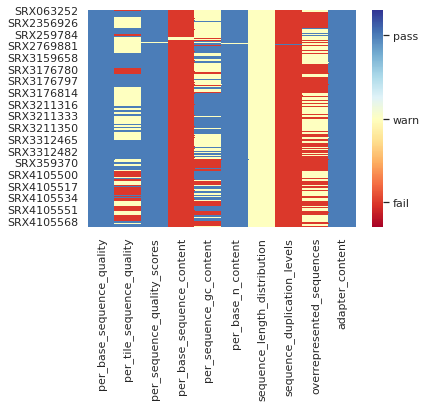

In [260]:
DF_fastqc = DF_qc_stats[fastqc_cols]
ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
            cmap='RdYlBu',vmax=1.3,vmin=-1.3)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['fail','warn','pass'])

<font size="4">The following four categories are the most important:
    - per_base_sequence_quality
    - per_sequence_quality_scores
    - per_base_n_content
    - adapter_content
    
If a sample does not pass any of these four categories, discard the sample
</font>

In [261]:
fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']

In [262]:
DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] != 'pass').any(axis=1)]
DF_failed_fastqc[fastqc_fail_cols]

,per_base_sequence_quality,per_sequence_quality_scores,per_base_n_content,adapter_content
SRX2769874,pass,pass,warn,pass
SRX2769877,pass,warn,pass,pass
SRX2769879,pass,pass,warn,pass


<font size="4">Mark samples as failed.</font>

In [263]:
DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)
DF_metadata['passed_fastqc']

SRX063252     True
SRX063253     True
SRX063254     True
SRX2356912    True
SRX2356913    True
              ... 
SRX689242     True
SRX7119038    True
SRX7119039    True
SRX7119040    True
SRX7119041    True
Name: passed_fastqc, Length: 316, dtype: bool

## Percent of reads aligned to genome

In [264]:
min_pct_aligned

40

In [265]:
align_cols = ['mRNA-sense','mRNA-antisense','rRNA-sense','rRNA-antisense',
              'tRNA-sense','tRNA-antisense','ncRNA-sense','ncRNA-antisense','unannotated']
total_alignment = DF_qc_stats[align_cols].sum(axis=1)
percent_alignment = total_alignment.divide(DF_qc_stats['total-reads'])*100

Text(0.5, 1.0, 'Histogram of Alignment Percentage')

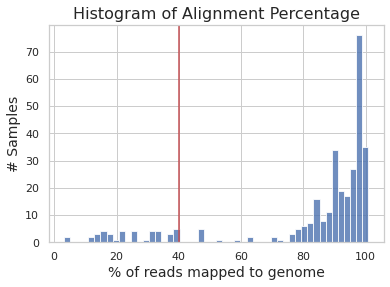

In [266]:
fig,ax = plt.subplots()
ax.hist(percent_alignment,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_pct_aligned,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('% of reads mapped to genome',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Histogram of Alignment Percentage',fontsize=16)

In [267]:
DF_failed_mapping = DF_qc_stats[percent_alignment < min_pct_aligned]
DF_failed_mapping

,mRNA-sense,mRNA-antisense,rRNA-sense,rRNA-antisense,tRNA-sense,tRNA-antisense,ncRNA-sense,ncRNA-antisense,unannotated,total-reads,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,se_sense,se_antisense,failed,pe_sense,pe_antisense
SRX2769875,761.0,0.0,3043.0,0.0,66181.0,0.0,0.0,0.0,6086.0,1686438.0,...,1829791,93319341,256142,82307262,11.800425,0.6667,0.3333,0.0000,0.0,0.0
SRX2769882,1151.0,0.0,4030.0,0.0,46635.0,0.0,0.0,0.0,5757.0,1850703.0,...,1917001,97767051,248683,90776643,7.150065,0.6923,0.3077,0.0000,0.0,0.0
SRX4105498,1315121.0,66163.0,3547612.0,1313930.0,0.0,0.0,0.0,0.0,328850.0,18060491.0,...,18071214,903560700,3004699,892642696,1.208331,0.0281,0.9695,0.0024,0.0,0.0
SRX4105499,811581.0,50987.0,3039907.0,911972.0,0.0,0.0,0.0,0.0,253601.0,12680705.0,...,12689107,634455350,2223659,626529936,1.249168,0.0326,0.9646,0.0027,0.0,0.0
SRX4105500,558846.0,88.0,730286.0,2878187.0,0.0,0.0,0.0,0.0,128985.0,28677256.0,...,28711730,1435586500,5054375,1416077546,1.358954,0.0170,0.9814,0.0016,0.0,0.0
SRX4105501,948087.0,50193.0,2791705.0,947186.0,0.0,0.0,0.0,0.0,299395.0,12940664.0,...,12954330,647716500,2226257,639268358,1.304296,0.0324,0.9649,0.0027,0.0,0.0
SRX4105502,1019500.0,289.0,4935948.0,1488619.0,0.0,0.0,0.0,0.0,392091.0,20576806.0,...,20595775,1029788750,3463960,1015841143,1.354414,0.0315,0.9677,0.0008,0.0,0.0
SRX4105504,1341009.0,67433.0,3617326.0,1339750.0,0.0,0.0,0.0,0.0,335347.0,18201496.0,...,18237617,911880850,3609581,899148459,1.396278,0.0326,0.9646,0.0028,0.0,0.0
SRX4105505,904796.0,56890.0,3389288.0,1016786.0,0.0,0.0,0.0,0.0,282765.0,14407729.0,...,14423625,721181250,2528681,711489916,1.343814,0.0305,0.9662,0.0033,0.0,0.0
SRX4105506,19826.0,0.0,34608.0,435073.0,0.0,0.0,0.0,0.0,4956.0,4480833.0,...,4950647,247532350,525110,221888156,10.359936,0.0318,0.9609,0.0073,0.0,0.0


In [268]:
DF_metadata['passed_pct_reads_mapped'] = ~DF_metadata.index.isin(DF_failed_mapping.index)
DF_metadata['passed_pct_reads_mapped']

SRX063252     True
SRX063253     True
SRX063254     True
SRX2356912    True
SRX2356913    True
              ... 
SRX689242     True
SRX7119038    True
SRX7119039    True
SRX7119040    True
SRX7119041    True
Name: passed_pct_reads_mapped, Length: 316, dtype: bool

## Number of aligned reads

<font size="4">The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting data.</font>

In [269]:
min_mrna_reads

500000.0

Text(0.5, 1.0, 'Number of reads mapped to CDS')

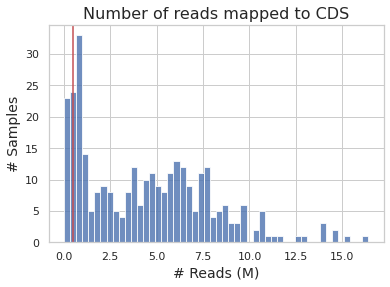

In [270]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['mRNA-sense']/1e6,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('# Reads (M)',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Number of reads mapped to CDS',fontsize=16)

<font size="4">Identify samples with poor read depth:</font>

In [271]:
DF_failed_mrna = DF_qc_stats[DF_qc_stats['mRNA-sense'] < min_mrna_reads].sort_values('mRNA-sense')
DF_failed_mrna.head()

,mRNA-sense,mRNA-antisense,rRNA-sense,rRNA-antisense,tRNA-sense,tRNA-antisense,ncRNA-sense,ncRNA-antisense,unannotated,total-reads,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,se_sense,se_antisense,failed,pe_sense,pe_antisense
SRX2769875,761.0,0.0,3043.0,0.0,66181.0,0.0,0.0,0.0,6086.0,1686438.0,...,1829791,93319341,256142,82307262,11.800425,0.6667,0.3333,0.0000,0.0,0.0
SRX2769882,1151.0,0.0,4030.0,0.0,46635.0,0.0,0.0,0.0,5757.0,1850703.0,...,1917001,97767051,248683,90776643,7.150065,0.6923,0.3077,0.0000,0.0,0.0
SRX4105507,17101.0,0.0,29886.0,379986.0,0.0,0.0,0.0,0.0,4281.0,3904744.0,...,4384745,219237250,439658,193335193,11.814624,0.0214,0.9705,0.0080,0.0,0.0
SRX4105506,19826.0,0.0,34608.0,435073.0,0.0,0.0,0.0,0.0,4956.0,4480833.0,...,4950647,247532350,525110,221888156,10.359936,0.0318,0.9609,0.0073,0.0,0.0
SRX4105532,25723.0,4290.0,98421.0,286706.0,0.0,0.0,0.0,0.0,12857.0,3052717.0,...,3156162,157808100,159814,151199821,4.187541,0.0680,0.9277,0.0043,0.0,0.0


<font size="4">Mark samples as failed.</font>

In [272]:
DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)
DF_metadata['passed_reads_mapped_to_CDS']

SRX063252      True
SRX063253      True
SRX063254      True
SRX2356912     True
SRX2356913     True
              ...  
SRX689242     False
SRX7119038     True
SRX7119039     True
SRX7119040     True
SRX7119041     True
Name: passed_reads_mapped_to_CDS, Length: 316, dtype: bool

# Examine Global Correlations

## Hierarchical Clustering

<font size=4> A clustermap is a great way to visualize the global correlations between one sample and all others. The following code uses hierarchical clustering to identify specific clusters in the clustermap <font size=4>
    
<font size=4> To increase the number of clusters, decrease the value of `thresh`. To decrease the number of clusters, increase the value of `thresh` <font size=4>

In [273]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches
# change this to get different number of clusters
thresh = .25

# retrieve clusters using fcluster 
corr = DF_log_tpm.corr()
corr.fillna(0,inplace=True)
dist = sch.distance.pdist(corr)
link = sch.linkage(dist, method='complete')
clst = pd.DataFrame(index=DF_log_tpm.columns)
clst['cluster'] = sch.fcluster(link, thresh * dist.max(), 'distance')

#get colors for each cluster
cm = plt.cm.get_cmap('tab20')
clr = dict(zip(clst.cluster.unique(), cm.colors))
clst['color'] = clst.cluster.map(clr)

print('Number of cluster: ', len(clr))

Number of cluster:  9


<font size="4">To view sample IDs in the clustermap, set `xticklabels` and `yticklabels` to `True`. You can increase the `size` variable to improve readability of sample IDs<font>

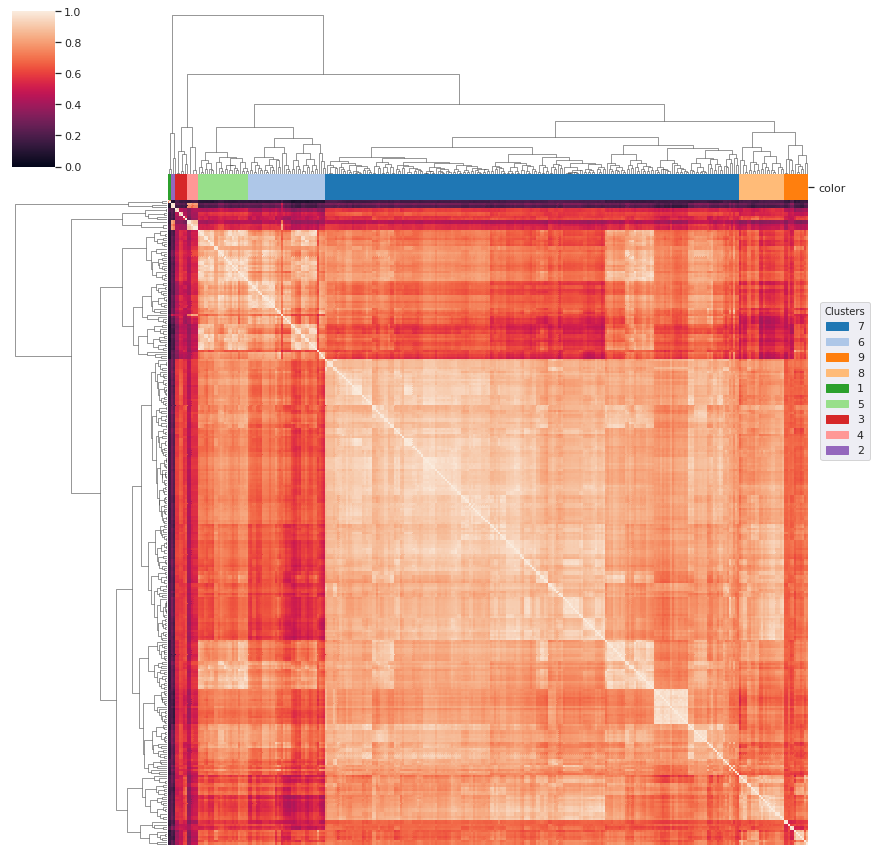

In [274]:
size = 12

legend_TN = [patches.Patch(color=c, label=l) for l,c in clr.items()]

sns.set(rc={'figure.facecolor':'white'})
g = sns.clustermap(DF_log_tpm.corr(), figsize=(size,size), 
                   row_linkage=link, col_linkage=link, col_colors=clst.color,
                  yticklabels=False, xticklabels=False, vmin=0, vmax=1)

l2=g.ax_heatmap.legend(loc='upper left', bbox_to_anchor=(1.01,0.85), handles=legend_TN,frameon=True)
l2.set_title(title='Clusters',prop={'size':10})

<font size="4">Select clusters to remove.</font>

In [275]:
#indicate which clusters you want to remove
remove_clst = [1,2]
failed_global_corr = clst[clst.cluster.isin(remove_clst)].index
failed_global_corr 

Index(['SRX2769875', 'SRX2769882', 'SRX5055972', 'SRX7119041'], dtype='object')

In [276]:
DF_metadata.loc['SRX2769875']

ReleaseDate                                            2017-04-29 11:14:15
TaxID                                                                 1140
ScientificName                Synechococcus elongatus PCC 7942 = FACHB-805
species_tax_id                                                       32046
class_tax_id                                                          1117
strain_tax_id                                                         1140
species                                            Synechococcus elongatus
LibraryLayout                                                       SINGLE
Platform                                                          ILLUMINA
Model                                                       Illumina MiSeq
Run                                                             SRR5486974
SRAStudy                                                         SRP105449
BioProject                                                     PRJNA372989
ProjectID                

In [277]:
DF_metadata['passed_global_correlation'] = ~DF_metadata.index.isin(failed_global_corr)
DF_metadata['passed_global_correlation']

SRX063252      True
SRX063253      True
SRX063254      True
SRX2356912     True
SRX2356913     True
              ...  
SRX689242      True
SRX7119038     True
SRX7119039     True
SRX7119040     True
SRX7119041    False
Name: passed_global_correlation, Length: 316, dtype: bool

In [278]:
DF_metadata.head()

,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,pH,growth_phase,OD,additional_notes,R1,R2,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation
SRX063252,2011-05-16 14:22:03,1140,Synechococcus elongatus PCC 7942 = FACHB-805,32046,1117,1140,Synechococcus elongatus,SINGLE,ILLUMINA,Illumina Genome Analyzer II,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True
SRX063253,2011-05-16 14:25:03,1140,Synechococcus elongatus PCC 7942 = FACHB-805,32046,1117,1140,Synechococcus elongatus,SINGLE,ILLUMINA,Illumina Genome Analyzer II,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True
SRX063254,2011-05-16 14:26:04,1140,Synechococcus elongatus PCC 7942 = FACHB-805,32046,1117,1140,Synechococcus elongatus,SINGLE,ILLUMINA,Illumina Genome Analyzer II,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True
SRX2356912,2017-02-15 16:19:00,1140,Synechococcus elongatus PCC 7942 = FACHB-805,32046,1117,1140,Synechococcus elongatus,SINGLE,ILLUMINA,Illumina HiSeq 2000,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True
SRX2356913,2017-02-15 16:19:00,1140,Synechococcus elongatus PCC 7942 = FACHB-805,32046,1117,1140,Synechococcus elongatus,SINGLE,ILLUMINA,Illumina HiSeq 2000,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True


# Remove failed samples

In [279]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_pct_reads_mapped',
              'passed_global_correlation']

In [280]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]
DF_metadata_passed.shape

(260, 51)

In [281]:
pass_qc

SRX063252      True
SRX063253      True
SRX063254      True
SRX2356912     True
SRX2356913     True
              ...  
SRX689242     False
SRX7119038     True
SRX7119039     True
SRX7119040     True
SRX7119041    False
Length: 316, dtype: bool

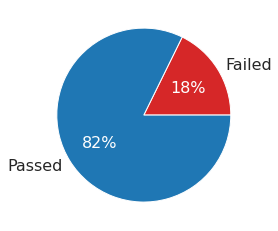

In [282]:
_,_,pcts = plt.pie(pass_qc.value_counts().sort_values(),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

# Save Metadata for Curation Process

In [77]:
DF_metadata_passed.to_csv(os.path.join(org_dir,'metadata_passed_qc_part1.csv'))

# Metadata Curation

<font size=4>The following sections can only be run after metadata curation is complete. To enable metadata curation, the code in this section sorts data by BioProject. </font>

## BioProject counts of passing metadata

In [283]:
DF_metadata_passed.BioProject.value_counts().sort_values(ascending=False)

PRJNA412032    60
PRJNA404081    36
PRJNA415380    36
PRJNA472248    33
PRJNA221220    18
PRJNA354335    16
PRJNA196229    16
PRJNA372989    14
PRJNA401742     8
PRJNA401777     8
PRJNA403840     6
PRJNA140271     3
PRJNA506580     3
PRJNA588336     3
Name: BioProject, dtype: int64

## BioProject counts of all metadata

In [284]:
DF_metadata.BioProject.value_counts().sort_values(ascending=False)

PRJNA472248    72
PRJNA412032    60
PRJNA404081    36
PRJNA415380    36
PRJNA354335    24
PRJNA372989    19
PRJNA221220    18
PRJNA196229    17
PRJNA401742     8
PRJNA401777     8
PRJNA403840     6
PRJNA506580     4
PRJNA588336     4
PRJNA140271     3
PRJNA259562     1
Name: BioProject, dtype: int64

# Correlations between replicates

<font size=4> First, get a full sample name </font>

In [285]:
# Turn off pesky warning
pd.set_option('mode.chained_assignment', None)

In [286]:
curated_metadata_file= "metadata_curated_project_spec.csv"

DF_metadata_passed = pd.read_csv(path.join(org_dir,curated_metadata_file),index_col=0,sep=',')
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with metadata: 316


,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,pH,growth_phase,OD,additional_notes,R1,R2,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation
SRX063252,2011-05-16 14:22:03,1140,Synechococcus elongatus PCC 7942 = FACHB-805,32046,1117,1140,Synechococcus elongatus,SINGLE,ILLUMINA,Illumina Genome Analyzer II,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True
SRX063253,2011-05-16 14:25:03,1140,Synechococcus elongatus PCC 7942 = FACHB-805,32046,1117,1140,Synechococcus elongatus,SINGLE,ILLUMINA,Illumina Genome Analyzer II,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True
SRX063254,2011-05-16 14:26:04,1140,Synechococcus elongatus PCC 7942 = FACHB-805,32046,1117,1140,Synechococcus elongatus,SINGLE,ILLUMINA,Illumina Genome Analyzer II,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True
SRX2356912,2017-02-15 16:19:00,1140,Synechococcus elongatus PCC 7942 = FACHB-805,32046,1117,1140,Synechococcus elongatus,SINGLE,ILLUMINA,Illumina HiSeq 2000,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True
SRX2356913,2017-02-15 16:19:00,1140,Synechococcus elongatus PCC 7942 = FACHB-805,32046,1117,1140,Synechococcus elongatus,SINGLE,ILLUMINA,Illumina HiSeq 2000,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True


In [287]:
DF_metadata_passed['full_name'] = DF_metadata_passed.loc[:,'project_name'].str.cat(DF_metadata_passed.loc[:,'condition_name'],sep=':')
DF_metadata_passed['full_name']

SRX063252                                      antibiotics:wt_1
SRX063253                                      antibiotics:wt_2
SRX063254                                      antibiotics:wt_3
SRX2356912                         rpaA_clck_res:wt_dusk_ZT_12h
SRX2356913                             rpaA_clck_res:wt_dark_5m
                                    ...                        
SRX5055970                           H2O2_str_resp:wt_stressed 
SRX5055971                         H2O2_str_resp: OsTPX+_normal
SRX7119038                    Abotic_Str_resp_OsDHAr :wt_normal
SRX7119039                 Abotic_Str_resp_OsDHAr :wt_stressed 
SRX7119040    Abotic_Str_resp_OsDHAr :transgenic microalgae_...
Name: full_name, Length: 260, dtype: object

## Compute Pearson R Score

<font size="4">Once you have updated your metadata files with the sample information, we can investigate correlations between biological replicates. We require biological replicates to have a Pearson R correlation above 0.95. For samples with more than 2 replicates, the replicates must have R >= 0.95 with at least one other replicate or it will be dropped. </font>

In [288]:
from tqdm.notebook import tqdm
import itertools
from scipy import stats
import numpy as np

In [289]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed)*(len(DF_metadata_passed)-1)/2
for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed.index,2),total=num_comparisons):
    if DF_metadata_passed.loc[exp1,'full_name'] == DF_metadata_passed.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

In [207]:
len(DF_metadata_passed)*(len(DF_metadata_passed)-1)/2

19306.0

19306.0

In [290]:
sns.set_style('ticks')

Median Pearson R between replicates:                                                                                  0.96


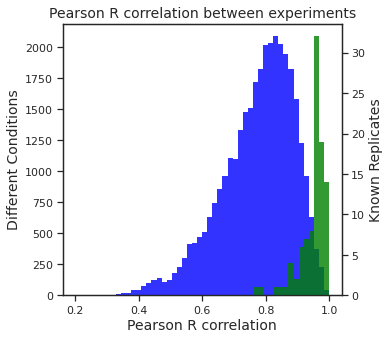

In [291]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:85.2f}'.format(med_corr))

In [293]:
#pearson r cutoff for replicates
rcutoff = 0.9

#for each sample get max correlation between replicates
dissimilar = []
for idx, grp in DF_metadata_passed.groupby('full_name'):
    ident = np.identity(len(grp))
    corrs = (DF_log_tpm[grp.index].corr() - ident).max()
    dissimilar.extend(corrs[corrs<rcutoff].index)
len(dissimilar)

90

In [303]:
DF_metadata['passed_replicate_corr'] = ~DF_metadata.index.isin(dissimilar)
DF_metadata_passed['passed_similar_replicates'] = ~DF_metadata_passed.index.isin(dissimilar)
DF_metadata_passed['passed_similar_replicates']

SRX063252     False
SRX063253     False
SRX063254     False
SRX2356912    False
SRX2356913    False
              ...  
SRX5055970    False
SRX5055971    False
SRX7119038    False
SRX7119039    False
SRX7119040    False
Name: passed_similar_replicates, Length: 260, dtype: bool

## Drop Samples with no replicates

In [304]:
#cond_counts = DF_metadata_passed.full_name.value_counts()
#drop_conds = cond_counts[cond_counts < 2].index
#len(drop_conds)

In [305]:
#DF_metadata_passed['passed_number_replicates'] = ~DF_metadata_passed.full_name.isin(drop_conds)

In [306]:
# this will give the metadata file with all samples containing replicates
#DF_metadata_passed = DF_metadata_passed[DF_metadata_passed['passed_number_replicates']]
#DF_metadata_passed

In [307]:
#^the above code was errased because Sugats code already removes samples with no replicates  

# Remove failed samples

In [308]:
qc_columns = ['passed_similar_replicates'] #,'passed_number_replicates']

In [309]:
DF_metadata_final = DF_metadata_passed[DF_metadata_passed[qc_columns].all(axis=1)]

In [310]:
DF_metadata_final.shape

(170, 66)

In [311]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

# Save final datasets

In [312]:
DF_log_tpm_final.to_csv(os.path.join(org_dir,'1_log_tpm_final.csv'))
DF_metadata_final.to_csv(os.path.join(org_dir,'1_metadata_final.csv'))

In [313]:
#Tahani 8/9/2020 time 11:30pm 